#### CANB8347 Machine Learning Project
Trying out supervised ML methods on pre-cleaned and imputed dataset
##### 3) Algorithm Validation

In [1]:
from ml_utils import *

# sklearn tools
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

In [2]:
# read in data that has been preprocessed to only contain numeric values
vlbw = pd.read_csv('data/vlbw_train_imputed.csv')

pull out labels for data as the column that we want to predict (live births)  
then, drop that column from the training data to ignore it in our algorithms

In [3]:
labels = vlbw['dead']
vlbw.drop('dead', axis=1, inplace=True)

In [4]:
# normalize each column to fractional representation between 0 and 1
vlbw_norm = normalize(vlbw, axis=1, norm='l1')

---
Perform k-fold split on preprocessed data for downstream validation of classifiers

In [5]:
# Logistic regression classifier
clf = LogisticRegressionCV(cv=5, random_state=0, multi_class='multinomial', max_iter=1000)

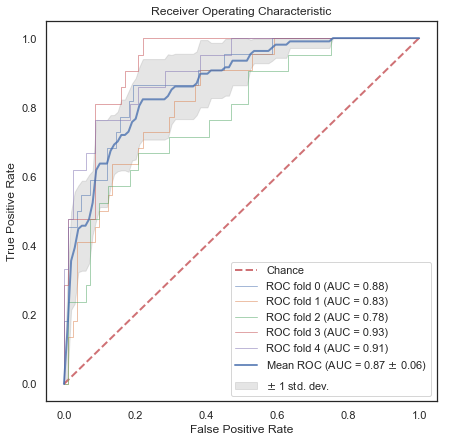

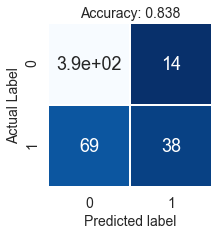

In [6]:
logreg_mets = roc_kfold(clf=clf, X=vlbw_norm, y=labels, k=5, seed=18)

In [7]:
# k-nearest neighbor classifier
neigh = KNeighborsClassifier(n_neighbors=3)

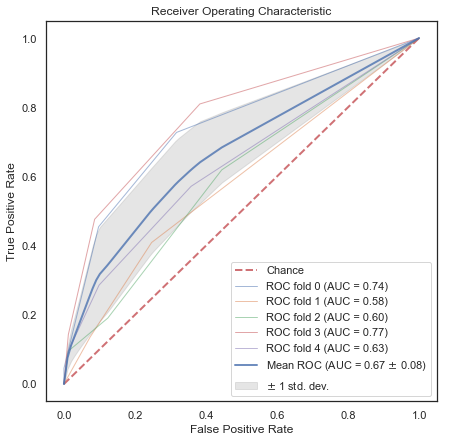

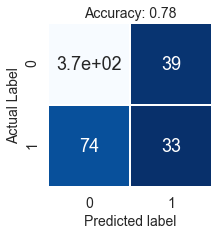

In [8]:
neigh_mets = roc_kfold(clf=neigh, X=vlbw_norm, y=labels, k=5, seed=18)

In [9]:
# random forest classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)

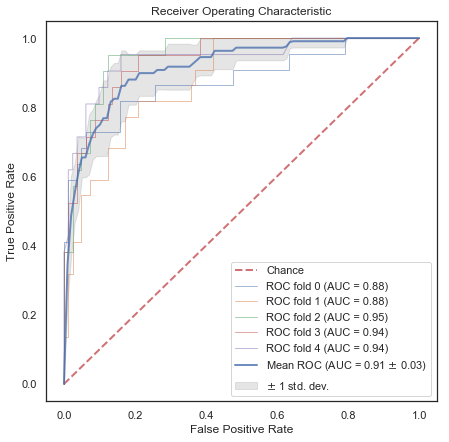

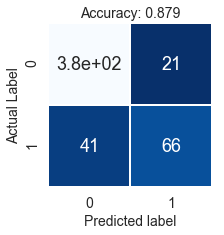

In [10]:
rf_mets = roc_kfold(clf=rf, X=vlbw_norm, y=labels, k=5, seed=18)

In [11]:
# Nu-Support Vector Classifier
svc = SVC(gamma='auto', probability=True)

/Users/cody/git/canb-ML/ml_utils.py:115: RuntimeWarning: invalid value encountered in long_scalars
  prec = cm[1,1]/cm[:,1].sum()
/Users/cody/git/canb-ML/ml_utils.py:115: RuntimeWarning: invalid value encountered in long_scalars
  prec = cm[1,1]/cm[:,1].sum()
/Users/cody/git/canb-ML/ml_utils.py:115: RuntimeWarning: invalid value encountered in long_scalars
  prec = cm[1,1]/cm[:,1].sum()
/Users/cody/git/canb-ML/ml_utils.py:115: RuntimeWarning: invalid value encountered in long_scalars
  prec = cm[1,1]/cm[:,1].sum()
/Users/cody/git/canb-ML/ml_utils.py:115: RuntimeWarning: invalid value encountered in long_scalars
  prec = cm[1,1]/cm[:,1].sum()


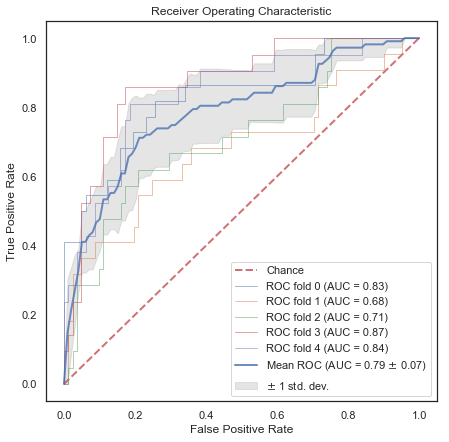

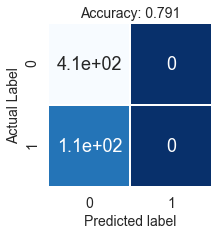

In [12]:
svc_mets = roc_kfold(clf=svc, X=vlbw_norm, y=labels, k=5, seed=18)

In [13]:
# Naive Bayes Gaussian
gnb = GaussianNB()

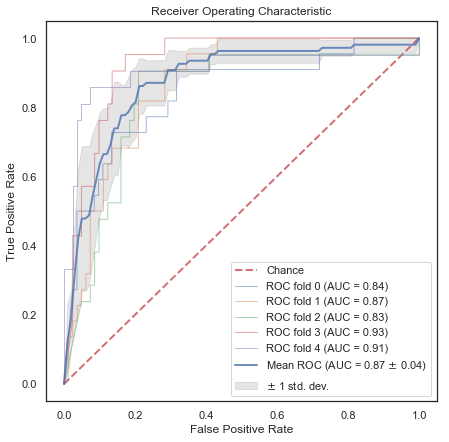

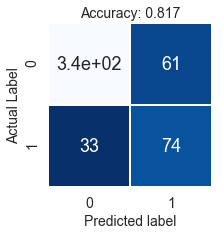

In [14]:
gnb_mets = roc_kfold(clf=gnb, X=vlbw_norm, y=labels, k=5, seed=18)

In [15]:
# Gradient boosting
gbc = GradientBoostingClassifier()

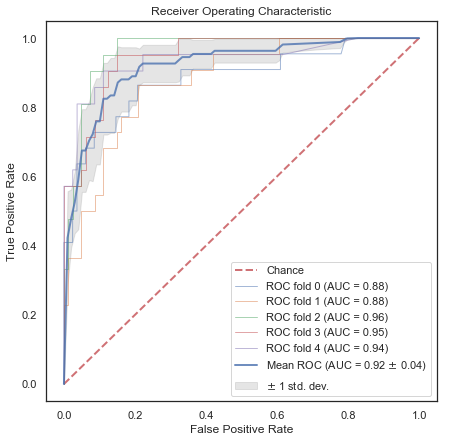

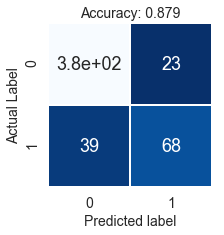

In [16]:
gbc_mets = roc_kfold(clf=gbc, X=vlbw_norm, y=labels, k=5, seed=18)

In [17]:
# adaboost
abc = AdaBoostClassifier()

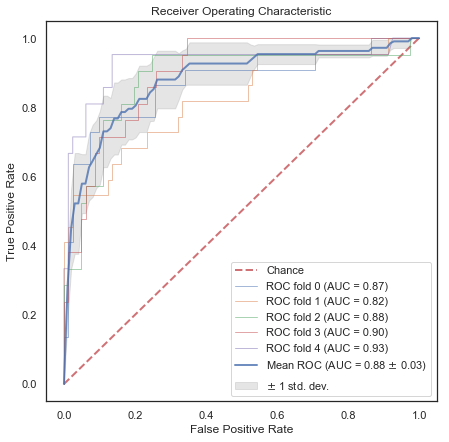

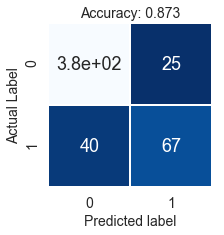

In [18]:
abc_mets = roc_kfold(clf=abc, X=vlbw_norm, y=labels, k=5, seed=18)